In [287]:
import vedo

from helper_loader import *
from histalign.backend.maths import apply_rotation

from histalign.backend.models import VolumeSettings
from scipy.spatial import distance

In [288]:
volume = load_volume(get_atlas_path(Resolution.MICRONS_50))

update_cameras(volume.shape)

In [289]:
settings = VolumeSettings(
    orientation=Orientation.CORONAL,
    resolution=Resolution.MICRONS_50,
    offset=100,
    pitch=0,
    yaw=0,
    shape=(264, 160, 228),
)

In [290]:
volume_center = np.array(
    [
        (settings.shape[0] - 1) // 2 + 1,
        (settings.shape[1] - 1) // 2,
        (settings.shape[2] - 1) // 2,
    ]
)

image_center = volume_center.copy()
image_center[0] -= settings.offset

In [291]:
array = volume.tonumpy()
array[
    volume_center[0] - settings.offset,
    volume_center[1],
    volume_center[2],
] = 1000

In [292]:
volume_center

array([132,  79, 113])

In [293]:
viewup_normal = np.array([0, -1, 0])
rotated_viewup_normal = apply_rotation(viewup_normal, settings)

In [294]:
point1 = image_center - rotated_viewup_normal * 1000
point2 = image_center + rotated_viewup_normal * 1000

volume_box = vedo.Box(pos=(0, volume.shape[0], 0, volume.shape[1], 0, volume.shape[2]))

intersections = volume_box.intersect_with_line(point1, point2)

In [295]:
distance_up = distance.euclidean(intersections[0], image_center)
distance_down = distance.euclidean(intersections[1], image_center)

In [304]:
distance_up

81.0

In [305]:
distance_down

79.0

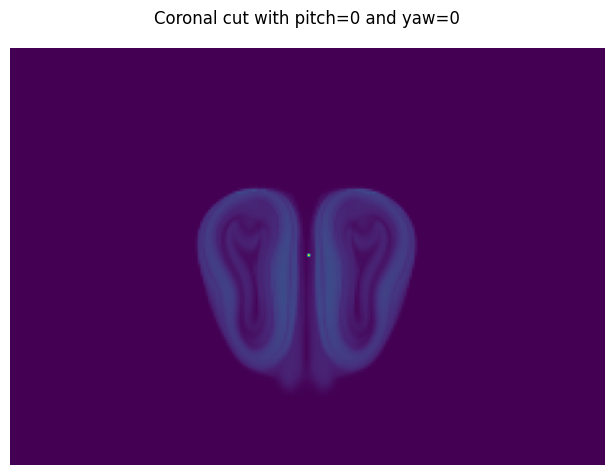

In [296]:
image = VolumeSlicer(volume=volume).slice(settings)
imshow(image, title=f"Coronal cut with pitch={settings.pitch} and yaw={settings.yaw}")

In [297]:
padded_image.shape

(162, 228)

In [303]:
padding

2

In [298]:
padding = abs(round(distance_up - distance_down))

if padding > 0:
    padded_image = np.pad(image, ([0, padding], [0, 0]))
elif padding < 0:
    padded_image = np.pad(image, ([padding, 0], [0, 0]))

In [299]:
padded_image[(padded_image.shape[0] - 1) // 2] = 1000
# padded_image[:, (padded_image.shape[1] - 1) // 2 + 1] = 1000

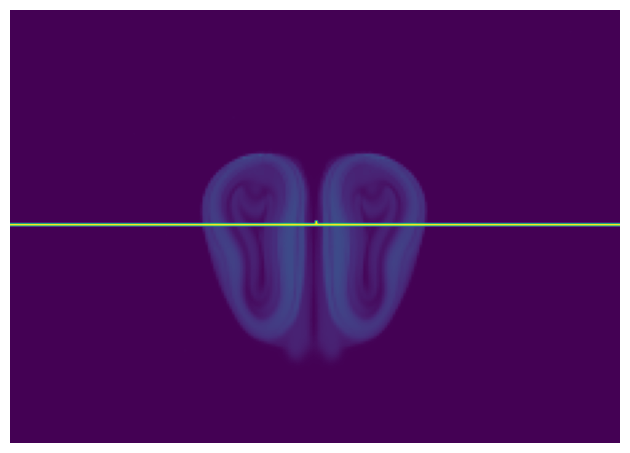

In [300]:
imshow(padded_image)

In [301]:
image.shape

(160, 228)

In [302]:
padded_image.shape

(162, 228)